In [1]:


import pandas as pd
import numpy as np
import itertools
import os

import json
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


sns.set(font_scale=1.4)
sns.set(rc={'figure.figsize':(12,6)})

In [2]:
path = "./results"

def load_experiment_results(path, experiment_dir, filename):
    
    path = os.path.join(path,experiment_dir)

    directory = os.fsencode(path)
    df_full = None

    for file in os.listdir(directory):
        fn = os.fsdecode(file)
        if fn.find(filename) != -1: 

            df = pd.read_csv(os.path.join(path, fn))

            if len(df) == 1:
                continue

            #print(fn)
            if df_full is None:
                df_full = df
            else:
                df_full=  pd.concat([df_full, df])
        else:
            print("file ignored:", fn)
    
    return df_full

def latex_pd(df):
    df = df.round(5)
    return df.to_latex(index=False)

In [3]:
df = load_experiment_results(path, "mc_drop_stability", "mc_drop_gridseach_")

file ignored: .ipynb_checkpoints


In [4]:
df["frame_id"] = df["image_id"].str.split("_").str[-1].astype("int")
df["experiment"] = df["image_id"].str.split("_").str[:-1].str.join("_")
df["certainty"] = 1 - df["agg_uncertainty"]

df.head()

,Unnamed: 0,num_mc_samples,dropout_prob,model_train_size,image_id,run_id,agg_uncertainty,frame_id,experiment,certainty
0,0,10,0.35,15,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,0,0.751599,0,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5,0.248401
1,1,10,0.35,15,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,1,0.743405,0,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5,0.256595
2,2,10,0.35,15,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,2,0.854310,0,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5,0.145690
3,3,10,0.35,15,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,3,0.674507,0,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5,0.325493
4,4,10,0.35,15,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,4,0.725158,0,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5,0.274842


In [5]:
avg_var = df[["image_id", "certainty","model_train_size"]].groupby(["image_id","model_train_size"]).agg("var").reset_index().groupby("model_train_size").agg("mean")
var_ds = df[df["run_id"] == 0][["image_id", "certainty","model_train_size"]].groupby(["image_id","model_train_size"]).agg("mean").reset_index().groupby("model_train_size").agg("var")



print(latex_pd(pd.merge(var_ds,avg_var, on="model_train_size").reset_index()))



\begin{tabular}{rrr}
\toprule
 model\_train\_size &  certainty\_x &  certainty\_y \\
\midrule
               15 &      0.00363 &      0.00239 \\
              240 &      0.00578 &      0.00024 \\
             3000 &      0.00577 &      0.00016 \\
             5800 &      0.00555 &      0.00016 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_845768/3990816046.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_var = df[["image_id", "certainty","model_train_size"]].groupby(["image_id","model_train_size"]).agg("var").reset_index().groupby("model_train_size").agg("mean")
/tmp/ipykernel_845768/3990816046.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_ds = df[df["run_id"] == 0][["image_id", "certainty","model_train_size"]].groupby(["image_id","model_train_size"]).agg("mean").reset_index().groupby("model_train_size").agg("var")
/tmp/ipykernel_845768/1281113294.py:31: FutureWarning: In future versions `DataFrame.to_latex` is

TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


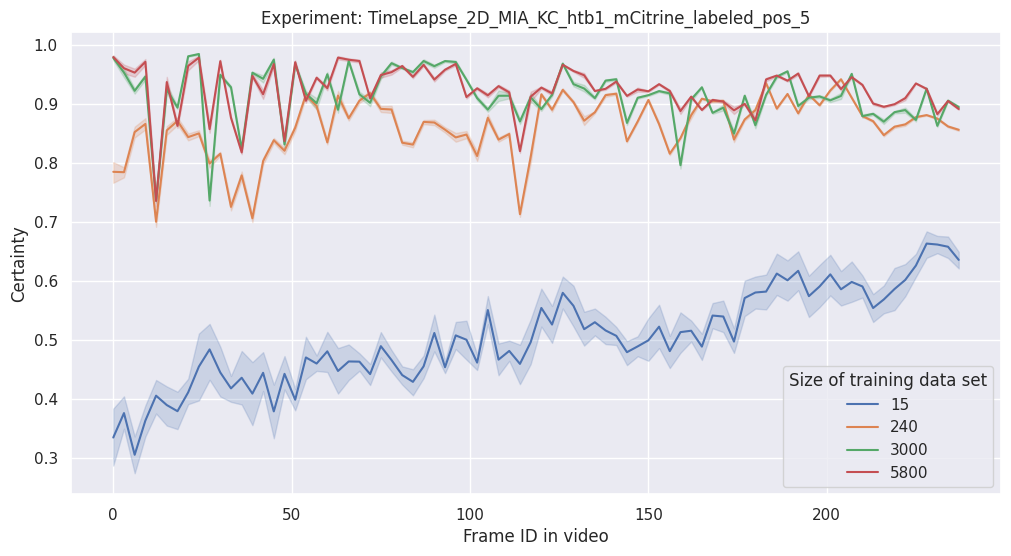

acdc_data2_F016_pos_3


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


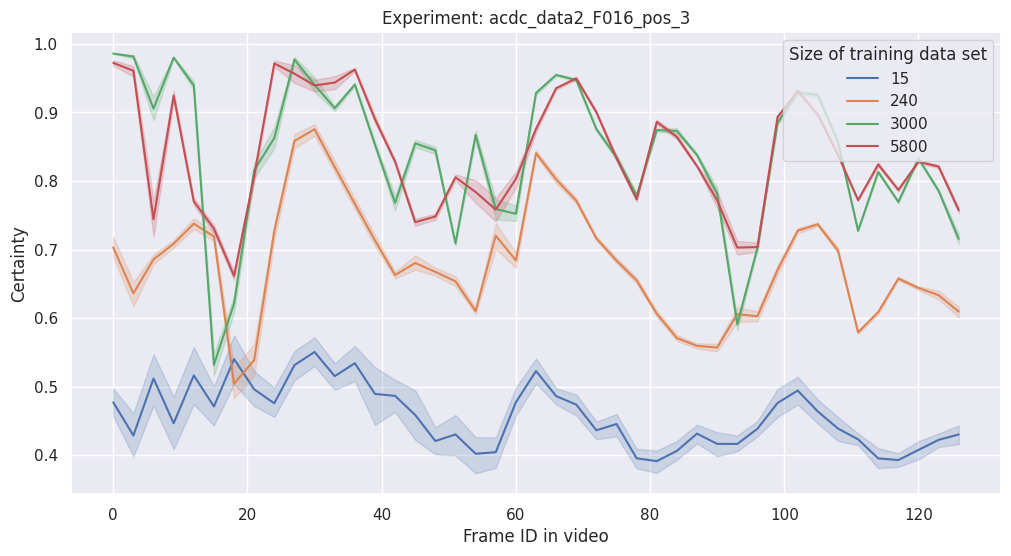

acdc_data2_kurt_306-3_0_20201028_pos_1


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


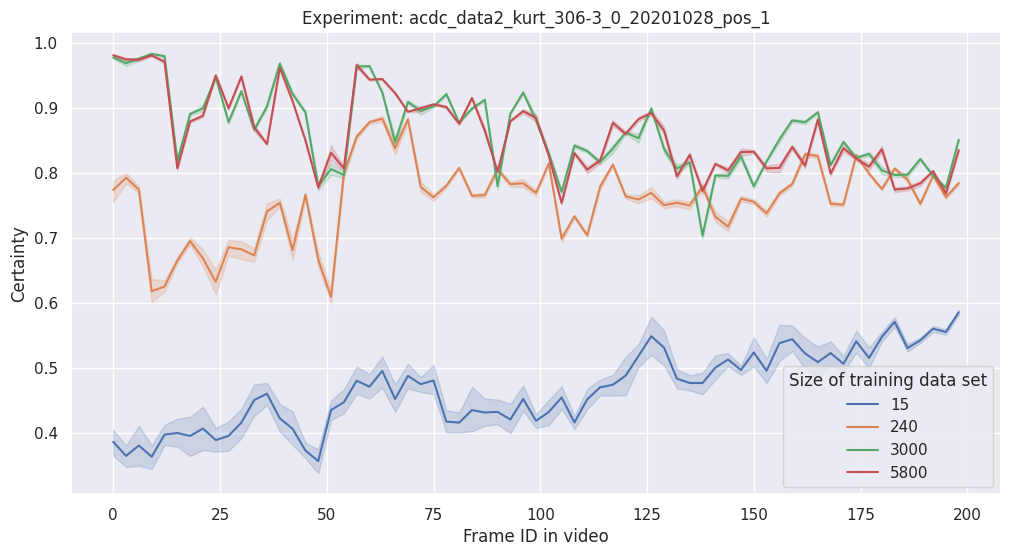

acdc_data3_20210722_pos_18


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


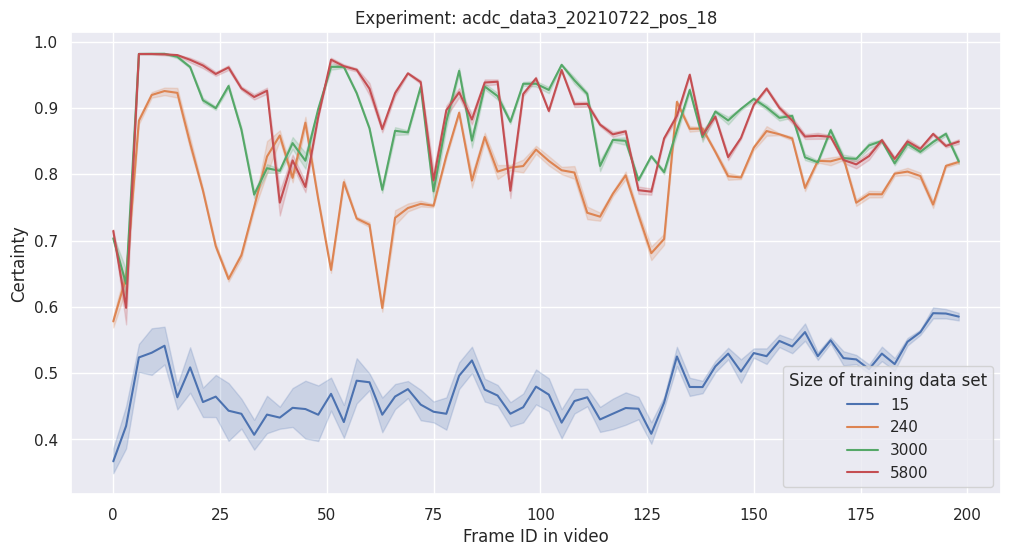

acdc_data3_20210722_pos_2


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


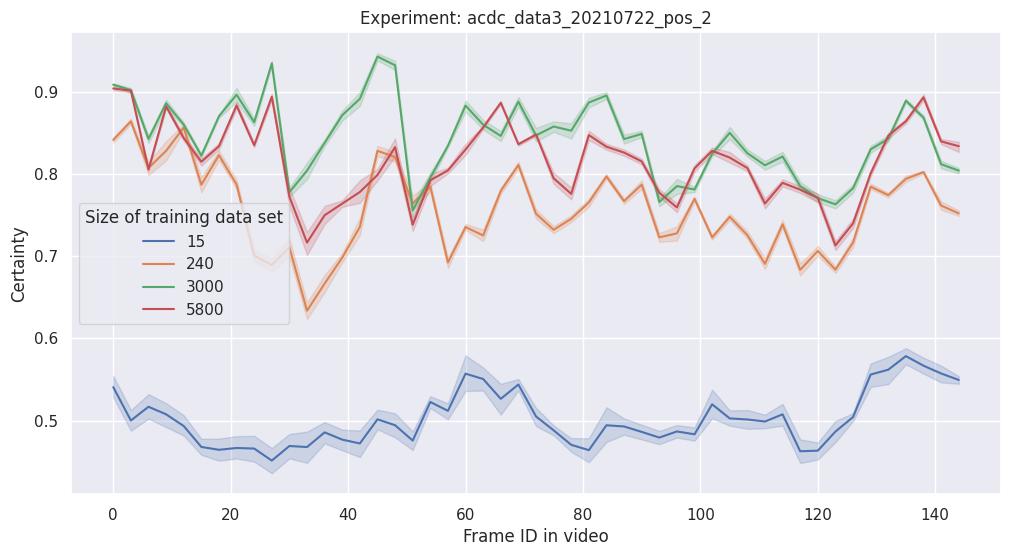

acdc_data3_20210722_pos_5


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


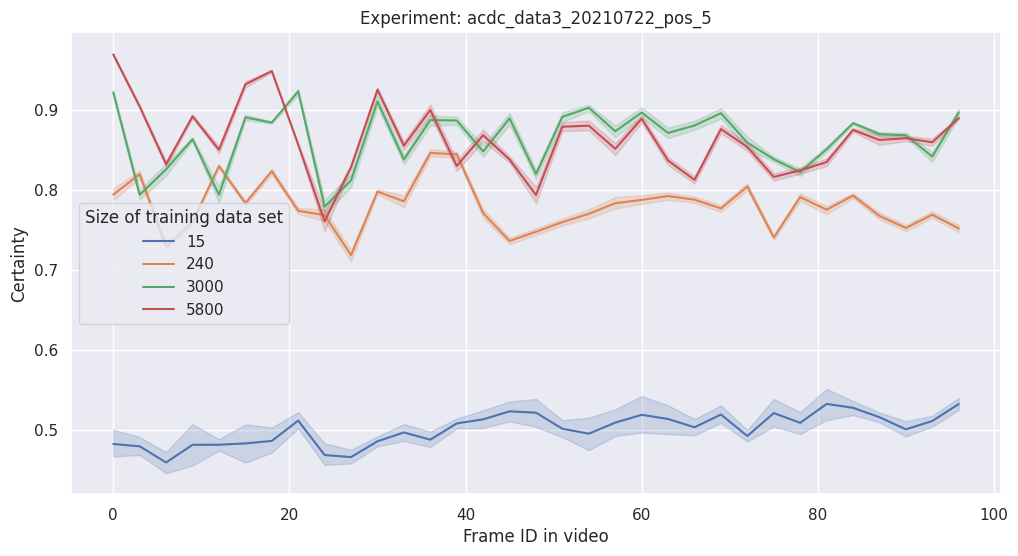

acdc_data3_20211029_pos_1


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


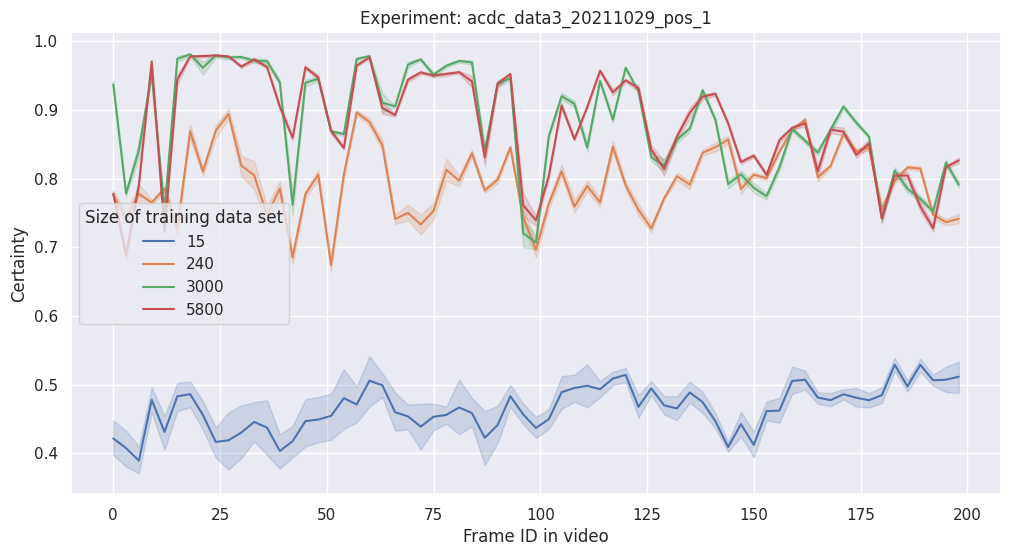

acdc_data3_20211029_pos_4


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


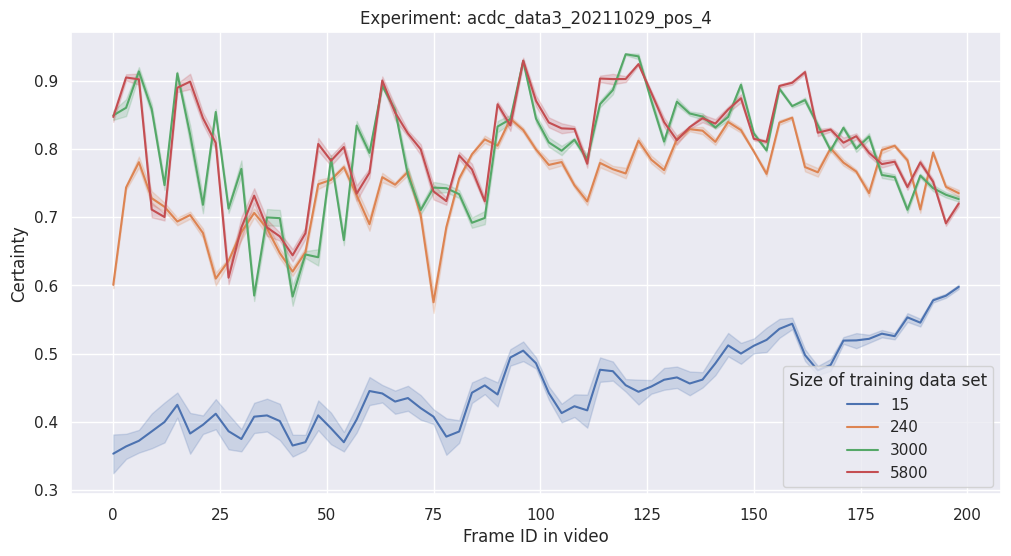

acdc_data3_Yagya_SCD_WT_pos_5


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


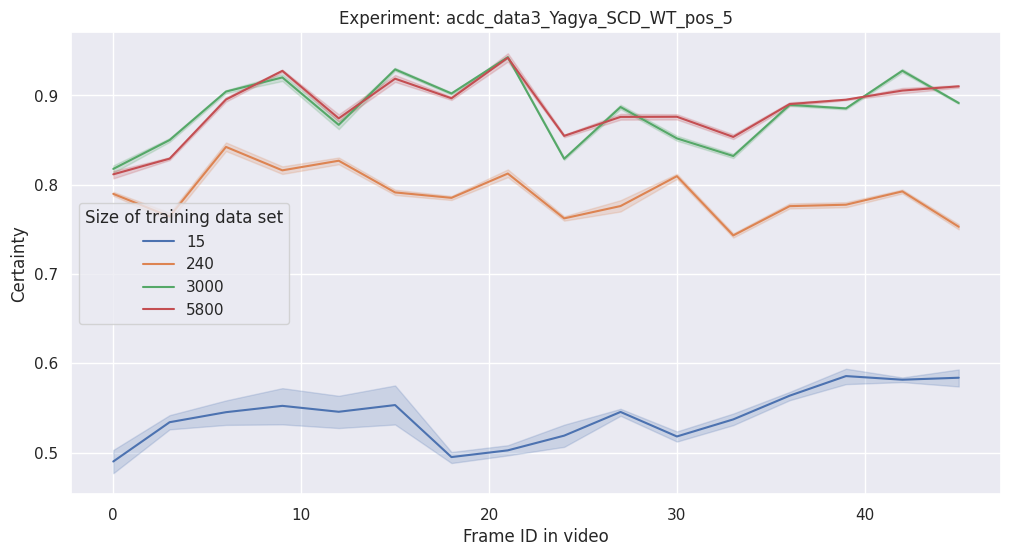

acdc_data3_Yagya_SCD_WT_pos_6


/tmp/ipykernel_845768/4194587647.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())


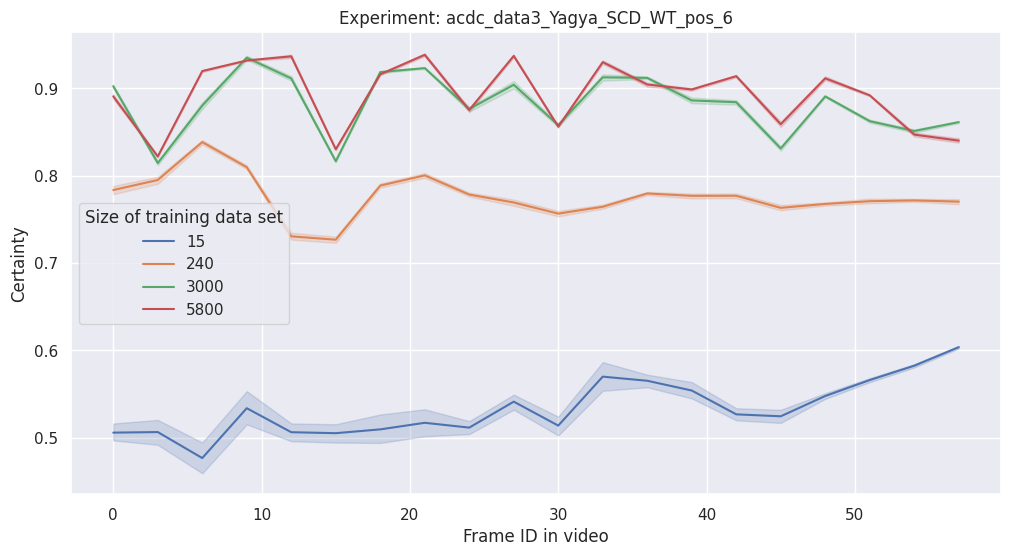

In [6]:
for experiment in df["experiment"].unique():
    df_tmp = df[df["experiment"] == experiment]
    print(experiment)
    plot = sns.lineplot(data=df_tmp, x="frame_id", y="certainty", hue="model_train_size",palette=sns.color_palette())
    plot.set(xlabel ="Frame ID in video", ylabel = "Certainty", title =f'Experiment: {experiment}')
    plt.legend(title='Size of training data set')
    plt.show()

In [ ]:
sns.pairplot(df)